#Data Preprocessing


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [ ]:
# Two data set:
#1. Taxi NYC data set, 2. weather_data_classified
working_directory = '/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/'
taxi_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Datasets/NYC_taxi_dataset.csv')
weather_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Datasets/Weather_data_classified1.csv')

In [ ]:
# Head of my data sets
print(taxi_data.head())
print(weather_data.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  PULocationID  \
0  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0           161   
1  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0            43   
2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0            48   
3  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0           138   
4  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0           107   

   DOLocationID  congestion_surcharge  
0           141                   2.5  
1           237                   2.5  
2           238                   2.5  
3             7                   0.0  
4            79                   2.5  
                  time  Hour  Day  Month  Dayofweek  Isweekend  temp  coco  \
0  2023-01-01 00:00:00     0    1      1          6          1   9.9   5.0   
1  2023-01-01 01:00:00     1    1      1          6          1  10.0   9.0   
2  2023-01-01 02:00:00     2    1      1          6

In [ ]:
def refine_weather_class(row):
    if row['Weather Classification'] == 'Other':  # Only refine if 'Other'
        if row['prcp'] > 0:
            return 'Rainy'
        elif row['snow'] > 0:
            return 'Snowy'
        elif row['wspd'] > 15:
            return 'Windy'
        elif row['tsun'] > 0:
            return 'Clear'
        else:
            return 'Cloudy'
    else:
        return row['Weather Classification']
weather_data['refined_weather_class'] = weather_data.apply(refine_weather_class, axis=1)
weather_data.head()

,time,Hour,Day,Month,Dayofweek,Isweekend,temp,coco,dwpt,rhum,prcp,snow,wdir,wspd,pres,tsun,Weather Classification,refined_weather_class
0,2023-01-01 00:00:00,0,1,1,6,1,9.9,5.0,9.9,100.0,1.0,0.0,220.0,7.6,1011.0,0.0,Foggy,Foggy
1,2023-01-01 01:00:00,1,1,1,6,1,10.0,9.0,10.0,100.0,0.5,0.0,220.0,5.4,1010.0,0.0,Foggy,Foggy
2,2023-01-01 02:00:00,2,1,1,6,1,10.5,8.0,10.5,100.0,1.0,0.0,210.0,7.6,1009.0,0.0,Foggy,Foggy
3,2023-01-01 03:00:00,3,1,1,6,1,10.6,5.0,10.4,99.0,2.2,0.0,190.0,9.4,1009.0,0.0,Foggy,Foggy
4,2023-01-01 04:00:00,4,1,1,6,1,10.3,5.0,10.1,99.0,0.7,0.0,260.0,11.2,1008.0,0.0,Foggy,Foggy


In [ ]:
#After removing 'others' classification: remodelling and saving the data
import pandas as pd

weather_data.drop(columns=['Weather Classification'],axis = 1, inplace=True)
weather_data.rename(columns={'refined_weather_class': 'Weather_Classification'}, inplace=True)
weather_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/weather_data_refined.csv', index=False)
print("Weather Data - Refined is saved")


Weather Data - Refined is saved


In [ ]:
# Reading the new dataset 'Weather_data_refined.csv' from drive
weather_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Weather_data_refined.csv')

In [ ]:
# preparing data for merging based on time
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%d-%m-%Y %H:%M')
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data['rounded_pickup_time'] = taxi_data['tpep_pickup_datetime'].dt.round('h')
weather_data['rounded_time'] = weather_data['time'].dt.round('h')
# Performing the merge based on the  time match
merged_data = pd.merge(taxi_data, weather_data, left_on='rounded_pickup_time', right_on='rounded_time', how='left')



In [ ]:
# Filtering features to clean the data
merged_data.columns



Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'PULocationID', 'DOLocationID', 'congestion_surcharge',
       'rounded_pickup_time', 'time', 'Hour', 'Day', 'Month', 'Dayofweek',
       'Isweekend', 'temp', 'coco', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir',
       'wspd', 'pres', 'tsun', 'Weather_Classification', 'rounded_time'],
      dtype='object')

In [ ]:
merged_data_cleaned['tpep_pickup_datetime'] = pd.to_datetime(merged_data_cleaned['tpep_pickup_datetime'])
merged_data_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(merged_data_cleaned['tpep_dropoff_datetime'])
merged_data_cleaned['Month'] = merged_data_cleaned['tpep_pickup_datetime'].dt.month
merged_data_cleaned['Day'] = merged_data_cleaned['tpep_pickup_datetime'].dt.day
merged_data_cleaned['Year'] = merged_data_cleaned['tpep_pickup_datetime'].dt.year
merged_data_cleaned['Time'] = merged_data_cleaned['tpep_pickup_datetime'].dt.strftime('%H:%M')  # Extract time in HH:MM format
merged_data_cleaned['Tip_Duration'] = (merged_data_cleaned['tpep_dropoff_datetime'] - merged_data_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 60  # Duration in minutes


<ipython-input-58-e2cbc33d06b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['tpep_pickup_datetime'] = pd.to_datetime(merged_data_cleaned['tpep_pickup_datetime'])
<ipython-input-58-e2cbc33d06b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(merged_data_cleaned['tpep_dropoff_datetime'])
<ipython-input-58-e2cbc33d06b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [ ]:
columns_to_keep = ['passenger_count', 'PULocationID', 'DOLocationID', 'congestion_surcharge','Weather_Classification', 'Month', 'Day', 'Year', 'Time', 'Tip_Duration']
merged_data_cleaned = merged_data_cleaned[columns_to_keep]
move_columns = ['Year', 'Month', 'Day', 'Time', 'Tip_Duration']
other_columns = [col for col in merged_data_cleaned.columns if col not in move_columns]
final_column_order = move_columns + other_columns
merged_data_cleaned = merged_data_cleaned[final_column_order]


In [ ]:
merged_data_cleaned.head()

,Year,Month,Day,Time,Tip_Duration,passenger_count,PULocationID,DOLocationID,congestion_surcharge,Weather_Classification
0,2023,1,1,00:32,8.433333,1.0,161,141,2.5,Foggy
1,2023,1,1,00:55,6.316667,1.0,43,237,2.5,Foggy
2,2023,1,1,00:25,12.750000,1.0,48,238,2.5,Foggy
3,2023,1,1,00:03,9.616667,0.0,138,7,0.0,Foggy
4,2023,1,1,00:10,10.833333,1.0,107,79,2.5,Foggy


In [ ]:
# Check for missing values
missing_values = merged_data_cleaned.isnull().sum()
print(missing_values)

Year                          0
Month                         0
Day                           0
Time                          0
Tip_Duration                  0
passenger_count           71743
PULocationID                  0
DOLocationID                  0
congestion_surcharge      71743
Weather_Classification       20
dtype: int64


In [ ]:
# Removing null values from passegenger count and congestion surchage
# Passegenger count null values to be replaced by the mode of the data
# Replacing null values in congerstion_surcharge to 0
mode_passenger_count = merged_data_cleaned['passenger_count'].mode()[0]
merged_data_cleaned['passenger_count'].fillna(mode_passenger_count, inplace=True)

merged_data_cleaned['congestion_surcharge'].fillna(0, inplace=True)


<ipython-input-67-fffad168c743>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data_cleaned['passenger_count'].fillna(mode_passenger_count, inplace=True)
<ipython-input-67-fffad168c743>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
# Rechecking for missing values
# Check for missing values
missing_values = merged_data_cleaned.isnull().sum()
print(missing_values)

Year                       0
Month                      0
Day                        0
Time                       0
Tip_Duration               0
passenger_count            0
PULocationID               0
DOLocationID               0
congestion_surcharge       0
Weather_Classification    20
dtype: int64


In [ ]:
#Inspecting the null value rows in 'Weather_Classification'
null_weather_class_rows = merged_data_cleaned[merged_data_cleaned['Weather_Classification'].isnull()]
print(null_weather_class_rows)

         Year  Month  Day   Time  Tip_Duration  passenger_count  PULocationID  \
2172     2022     12   31  14:24     10.516667              1.0            48   
2173     2022     12   31  14:39      3.900000              1.0           163   
2931     2022     12   31  22:02     25.666667              1.0            79   
2932     2022     12   31  22:34      6.033333              1.0           239   
7276     2022     12   31  15:14     11.366667              1.0           193   
8046     2022     12   31  22:42     14.133333              1.0           142   
8047     2022     12   31  23:07     12.116667              1.0           263   
10023    2022     10   24  17:37      0.066667              1.0             1   
18219    2022     10   24  20:01      0.033333              1.0            17   
21660    2022     10   24  21:45      0.050000              1.0            48   
22489    2022     10   24  23:15      0.166667              1.0           211   
24577    2022     10   25  0

In [ ]:
# dropping the null values in the feature
merged_data_cleaned.dropna(subset=['Weather_Classification'], inplace=True)

In [ ]:
# Rechecking for missing values
# Check for missing values
missing_values = merged_data_cleaned.isnull().sum()
print(missing_values)

Year                      0
Month                     0
Day                       0
Time                      0
Tip_Duration              0
passenger_count           0
PULocationID              0
DOLocationID              0
congestion_surcharge      0
Weather_Classification    0
dtype: int64


## Feature Engineering

In [ ]:
# Adding data time coloum to extract new features to the dataset
merged_data_cleaned['tpep_pickup_datetime'] = pd.to_datetime(merged_data_cleaned[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1) + ' ' + merged_data_cleaned['Time'])
print(merged_data_cleaned[['tpep_pickup_datetime']].head())

  tpep_pickup_datetime
0  2023-01-01 00:32:00
1  2023-01-01 00:55:00
2  2023-01-01 00:25:00
3  2023-01-01 00:03:00
4  2023-01-01 00:10:00


In [ ]:
# Feature addition in the data set
import holidays
us_holidays = holidays.US(years=[2023])
# Creating a new feature 'is_holiday' where True if the date is a holiday, else False
merged_data_cleaned['is_holiday'] = merged_data_cleaned['tpep_pickup_datetime'].dt.date.isin(us_holidays)

merged_data_cleaned['is_weekend'] = merged_data_cleaned['tpep_pickup_datetime'].dt.dayofweek >= 5

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

merged_data_cleaned['time_of_day'] = merged_data_cleaned['tpep_pickup_datetime'].dt.hour.apply(time_of_day)



In [ ]:
# Inspecting the new dataset
print(merged_data_cleaned.head())

   Tip_Duration  passenger_count  PULocationID  DOLocationID  \
0      8.433333              1.0           161           141   
1      6.316667              1.0            43           237   
2     12.750000              1.0            48           238   
3      9.616667              0.0           138             7   
4     10.833333              1.0           107            79   

   congestion_surcharge Weather_Classification tpep_pickup_datetime  \
0                   2.5                  Foggy  2023-01-01 00:32:00   
1                   2.5                  Foggy  2023-01-01 00:55:00   
2                   2.5                  Foggy  2023-01-01 00:25:00   
3                   0.0                  Foggy  2023-01-01 00:03:00   
4                   2.5                  Foggy  2023-01-01 00:10:00   

   is_holiday  is_weekend time_of_day         pickup_hour  \
0        True        True       Night 2023-01-01 01:00:00   
1        True        True       Night 2023-01-01 01:00:00   
2    

In [ ]:
# Creating Traffic Volume feature using volume of pickups at each location at different times of the day
merged_data_cleaned['Day'] = merged_data_cleaned['tpep_pickup_datetime'].dt.day
merged_data_cleaned['Month'] = merged_data_cleaned['tpep_pickup_datetime'].dt.month
merged_data_cleaned['Year'] = merged_data_cleaned['tpep_pickup_datetime'].dt.year
merged_data_cleaned['pickup_hour'] = merged_data_cleaned['tpep_pickup_datetime'].dt.round('h')
# Create a new column combining location and hour for grouping
traffic_volume = merged_data_cleaned.groupby(['PULocationID', 'Day', 'Month', 'Year', 'pickup_hour']).size().reset_index(name='traffic_volume')
df_with_traffic = pd.merge(merged_data_cleaned, traffic_volume,
                           on=['PULocationID', 'Day', 'Month', 'Year', 'pickup_hour'],
                           how='left')

In [ ]:
print(df_with_traffic .head())


   Tip_Duration  passenger_count  PULocationID  DOLocationID  \
0      8.433333              1.0           161           141   
1      6.316667              1.0            43           237   
2     12.750000              1.0            48           238   
3      9.616667              0.0           138             7   
4     10.833333              1.0           107            79   

   congestion_surcharge Weather_Classification tpep_pickup_datetime  \
0                   2.5                  Foggy  2023-01-01 00:32:00   
1                   2.5                  Foggy  2023-01-01 00:55:00   
2                   2.5                  Foggy  2023-01-01 00:25:00   
3                   0.0                  Foggy  2023-01-01 00:03:00   
4                   2.5                  Foggy  2023-01-01 00:10:00   

   is_holiday  is_weekend time_of_day         pickup_hour  \
0        True        True       Night 2023-01-01 01:00:00   
1        True        True       Night 2023-01-01 01:00:00   
2    

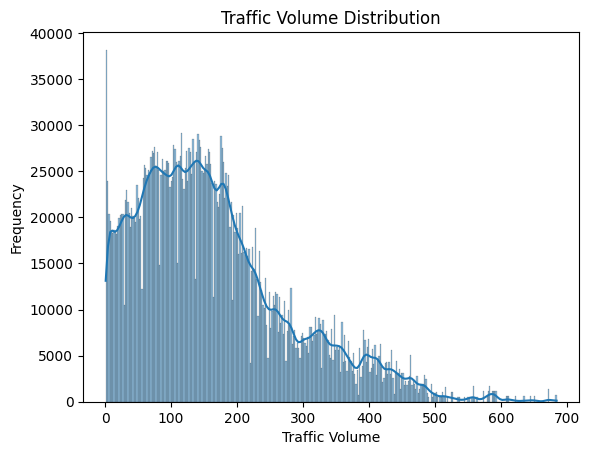

In [ ]:
# Traffic volume distribution to check for threshold values
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df_with_traffic['traffic_volume'], kde=True)
plt.title("Traffic Volume Distribution")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Calculating quantiles to classify data into 'Light', 'Medium' and 'Heavy' categories:
quantiles = df_with_traffic['traffic_volume'].quantile([0.33, 0.66]).values

low_threshold = quantiles[0]
high_threshold = quantiles[1]

bins = [0, low_threshold, high_threshold, float('inf')]
labels = ['Light', 'Medium', 'Heavy']
df_with_traffic['traffic_category'] = pd.cut(df_with_traffic['traffic_volume'], bins=bins, labels=labels, right=False)

In [ ]:
# Inspecting the new dataset created after traffic classification
df_with_traffic.head()

,Tip_Duration,passenger_count,PULocationID,DOLocationID,congestion_surcharge,Weather_Classification,tpep_pickup_datetime,is_holiday,is_weekend,time_of_day,pickup_hour,Location_Hour,Day,Month,Year,traffic_volume,traffic_category
0,8.433333,1.0,161,141,2.5,Foggy,2023-01-01 00:32:00,True,True,Night,2023-01-01 01:00:00,161_2023-01-01 01:00:00,1,1,2023,199,Heavy
1,6.316667,1.0,43,237,2.5,Foggy,2023-01-01 00:55:00,True,True,Night,2023-01-01 01:00:00,43_2023-01-01 01:00:00,1,1,2023,80,Light
2,12.750000,1.0,48,238,2.5,Foggy,2023-01-01 00:25:00,True,True,Night,2023-01-01 00:00:00,48_2023-01-01 00:00:00,1,1,2023,61,Light
3,9.616667,0.0,138,7,0.0,Foggy,2023-01-01 00:03:00,True,True,Night,2023-01-01 00:00:00,138_2023-01-01 00:00:00,1,1,2023,16,Light
4,10.833333,1.0,107,79,2.5,Foggy,2023-01-01 00:10:00,True,True,Night,2023-01-01 00:00:00,107_2023-01-01 00:00:00,1,1,2023,66,Light


In [ ]:
# saving data set as processed data set
df_with_traffic.to_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Processed_data_set.csv', index=False)

In [ ]:
# Calling Processed data set to the environment for modelling
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project_Numerical Methods/Processed_data_set.csv')


## Modelling

In [ ]:
#Label encoding for Weather_Classification and Encoding the 'time_of_day' feature
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Weather_Classification'] = label_encoder.fit_transform(df['Weather_Classification'])

df['time_of_day_encoded'] = label_encoder.fit_transform(df['time_of_day'])

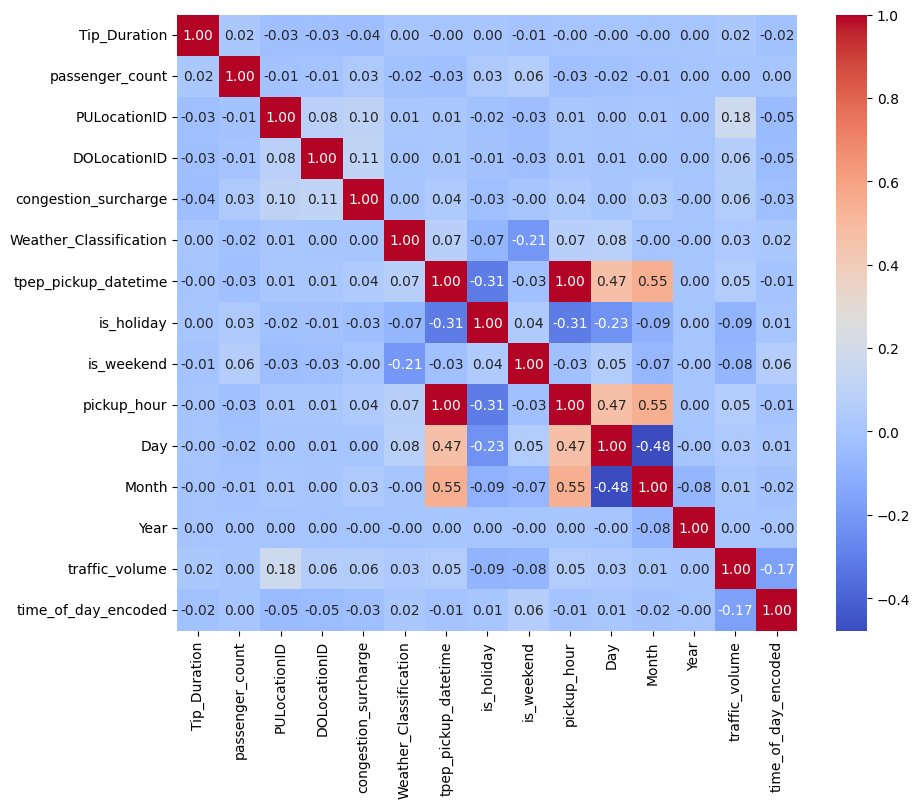

In [ ]:
# checking for correlation between variable and inspecting redundant varibles
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])
df = df.drop(columns=['traffic_category','time_of_day','Location_Hour'])
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



In [ ]:
# selecting features for model training
df_selected = df.drop(columns=['tpep_pickup_datetime', 'PULocationID', 'DOLocationID', 'congestion_surcharge',
                               'Tip_Duration', 'passenger_count','pickup_hour'])


In [ ]:
# Define features and target
X = df_selected.drop(columns=['traffic_volume'])  # Features
y = df_selected['traffic_volume']  # Target variable

In [ ]:
# Check the feature set
X.head()

,Weather_Classification,is_holiday,is_weekend,Day,Month,Year,time_of_day_encoded
0,1,True,True,1,1,2023,3
1,1,True,True,1,1,2023,3
2,1,True,True,1,1,2023,3
3,1,True,True,1,1,2023,3
4,1,True,True,1,1,2023,3


In [ ]:
# Splitting data set into train and test, getting 4 variable: 'X_tain', 'X_test', 'y_train', y_test'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check if the dataset is ready for training
print("Training features:", X_train.shape)
print("Test features:", X_test.shape)

Training features: (2773077, 8)
Test features: (693270, 8)


In [ ]:
print(df_selected.dtypes)

Weather_Classification    int64
is_holiday                 bool
is_weekend                 bool
Day                       int64
Month                     int64
Year                      int64
traffic_volume            int64
time_of_day_encoded       int64
dtype: object


In [ ]:
df_selected.head()

,Weather_Classification,is_holiday,is_weekend,Day,Month,Year,traffic_volume,time_of_day_encoded
0,1,True,True,1,1,2023,199,3
1,1,True,True,1,1,2023,80,3
2,1,True,True,1,1,2023,61,3
3,1,True,True,1,1,2023,16,3
4,1,True,True,1,1,2023,66,3


In [ ]:
# Initialize and train the model (Random Forest Regressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
X_train = X_train.select_dtypes(exclude=['datetime'])
X_test = X_test.select_dtypes(exclude=['datetime'])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

# Feature importance (optional, to see which features are most important)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)


Mean Absolute Error: 84.95979995047855
R2 Score: 0.11538110413961633
Feature Importance:
                  Feature  Importance
6     time_of_day_encoded    0.496864
3                     Day    0.220995
2              is_weekend    0.144100
0  Weather_Classification    0.075461
1              is_holiday    0.054024
4                   Month    0.008536
5                    Year    0.000020


In [ ]:
# Using XGBoost Algorithm and then compare with previous model used
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error: {mae_xgb}")
print(f"XGBoost - R2 Score: {r2_xgb}")

# Feature importance for XGBoost (optional, to see which features are most important)
importances_xgb = xgb_model.feature_importances_
feature_importance_df_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

print("XGBoost Feature Importance:")
print(feature_importance_df_xgb)

XGBoost - Mean Absolute Error: 84.96346345378245
XGBoost - R2 Score: 0.11536318063735962
XGBoost Feature Importance:
                  Feature  Importance
2              is_weekend    0.331348
1              is_holiday    0.282106
6     time_of_day_encoded    0.255800
3                     Day    0.057041
4                   Month    0.037870
0  Weather_Classification    0.035834
5                    Year    0.000000


In [ ]:
# Saving the model
import joblib
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

joblib.dump(final_model, 'random_forest_traffic_model.pkl')

['random_forest_traffic_model.pkl']

In [ ]:
predictions = final_model.predict(X_test)
predictions_df = pd.DataFrame(predictions, columns=['Predicted_traffic_volume'])


In [ ]:
print(predictions_df)

        Predicted_traffic_volume
0                     200.086006
1                      98.332434
2                     206.310364
3                     178.989573
4                     138.566696
...                          ...
693265                213.758821
693266                176.306704
693267                178.989573
693268                166.264922
693269                175.546401

[693270 rows x 1 columns]
